<a href="https://colab.research.google.com/github/Bubukisapisa/ML_education/blob/main/%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
medical_df = pd.read_csv('drive/MyDrive/ML for people/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [5]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

**1.Метод МНК**

In [6]:
def norm_equation(X, y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

In [7]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [8]:
MNK_coefs = norm_equation(X_with_intercept, y)

In [9]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [10]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:5]

array([2719.0598744 , 5391.54900271, 6727.79356686, 6460.54465403,
       6193.2957412 ])

In [11]:
X_with_intercept[:5]

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       [ 1., 32.],
       [ 1., 31.]])

In [12]:
rmse = np.sqrt(1 / len(y) * sum((y-predictions_MNK)**2))
rmse

np.float64(4662.505766636393)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse2 = np.sqrt(mean_squared_error(y, predictions_MNK))
rmse2

np.float64(4662.505766636395)

**2. Full-Batch градієнтного спуску**

In [14]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X + b

m, b, errors[-1:-10:-1]

(np.float64(221.1045843794301),
 np.float64(-41.98126853149978),
 [23636496769.696453,
  23636519696.41001,
  23636542624.16191,
  23636565552.95214,
  23636588482.78076,
  23636611413.64783,
  23636634345.553406,
  23636657278.49749,
  23636680212.48018])

In [15]:
grad_coefs = np.array([b, m])
grad_coefs

array([-41.98126853, 221.10458438])

In [16]:
predictions_gradient_1= np.dot(X_with_intercept, grad_coefs)
predictions_gradient_1

array([3937.9012503 , 6148.94709409, 7254.47001599, ..., 3937.9012503 ,
       3937.9012503 , 4601.21500344])

In [17]:
rmse_grad_1 = np.sqrt(1 / len(y) * sum((y-predictions_gradient_1)**2))
rmse_grad_1

np.float64(4713.250582815521)

In [18]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.000007, epochs=20000)
predictions_fbgd = m * X + b

grad_coefs_2 = np.array([b, m])
m, b, errors[-1:-10:-1]


(np.float64(221.52062886623543),
 np.float64(-60.45933388507362),
 [23627388246.850025,
  23627389822.794758,
  23627391398.7445,
  23627392974.69925,
  23627394550.65894,
  23627396126.623672,
  23627397702.593407,
  23627399278.568066,
  23627400854.54779])

In [19]:
predictions_gradient_2= np.dot(X_with_intercept, grad_coefs_2)
predictions_gradient_2

array([3926.91198571, 6142.11827437, 7249.7214187 , ..., 3926.91198571,
       3926.91198571, 4591.47387231])

In [20]:
rmse_grad_2 = np.sqrt(1 / len(y) * sum((y-predictions_gradient_2)**2))
rmse_grad_2

np.float64(4712.344478089313)

In [36]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=100000)
predictions_fbgd = m * X + b



In [37]:
grad_coefs_3 = np.array([b, m])
m, b,errors[-1]

(np.float64(229.61200062335735),
 np.float64(-419.8269036279835),
 23467023082.503162)

In [22]:
predictions_gradient_3= np.dot(X_with_intercept, grad_coefs_3)
predictions_gradient_3

array([3713.18910759, 6009.30911383, 7157.36911694, ..., 3713.18910759,
       3713.18910759, 4402.02510946])

In [23]:
rmse_grad_3 = np.sqrt(1 / len(y) * sum((y-predictions_gradient_3)**2))
rmse_grad_3

np.float64(4696.325306932075)

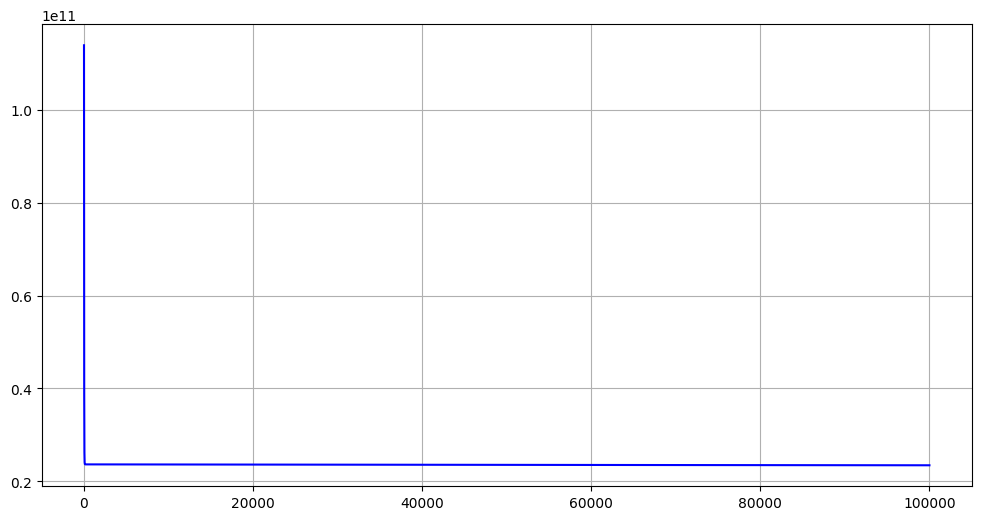

In [34]:
iterations = list(range(len(errors)))
plt.figure(figsize=(12, 6))
plt.plot(iterations, errors, color='blue', label='Data points')
plt.grid(True)
plt.show()

**3. LinReg**

In [24]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X.to_frame(), y)

LinearRegression()

In [27]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [29]:
predictions_sklearn = lin_reg.predict(X.to_frame())

In [30]:
rmse_sklearn = np.sqrt(1 / len(y) * sum((y-predictions_sklearn)**2))

In [31]:
rmse_sklearn

np.float64(4662.505766636391)

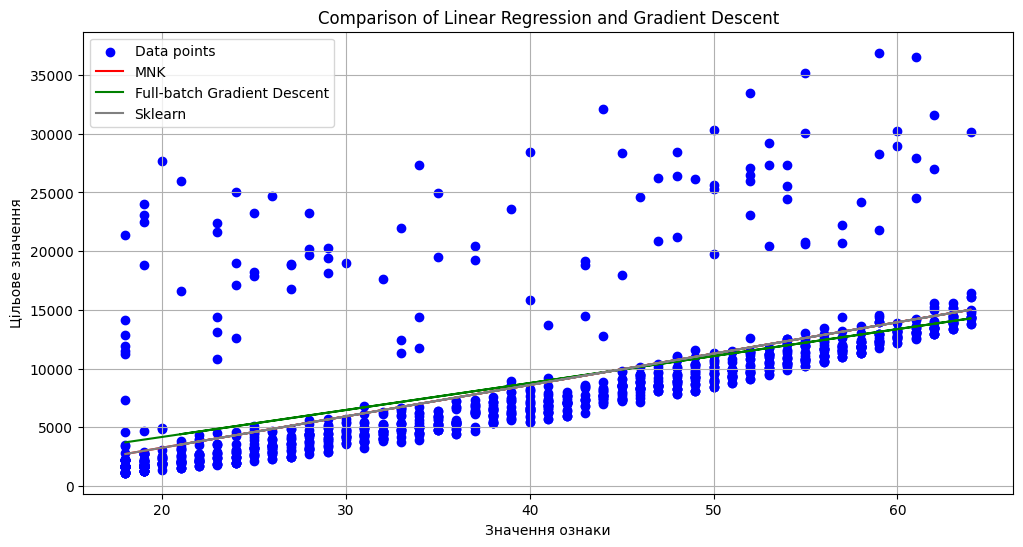

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_gradient_3, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з стохаст. град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  -419.8269036279835 229.61200062335735
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


Результат градієнтного спуску відрізняється від МНК та лін регресії від skllearn - судячи по графіку, град спуск гірше впорався з передбаченням для молодших але краще для старших людей (так як кут нахилу крутіший).
Хоча коефіцієнт при змінній X сильно відрізняється (-419 vs -2091) проте не можу сказати що різниця в прогнозі велика (але на людях молодого віку досить помітна).
Думаю, в даному випадку обрав би метод МНК так як він підбирає ідеальний варіант коефіцієнтів, базуючись на похідній в нулі.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [46]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [50]:
X = smoker_df['age'].to_frame()
y = smoker_df['charges']

In [48]:
lin_reg_smoker = LinearRegression()

In [51]:
lin_reg_smoker.fit(X, y)

LinearRegression()

In [53]:
lin_reg_smoker.coef_, lin_reg_smoker.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [54]:
smoker_predictions = lin_reg_smoker.predict(X)

In [56]:
rmse_sklearn = np.sqrt(1 / len(y) * sum((y-smoker_predictions)**2))
rmse_sklearn

np.float64(10711.00334810241)

In [58]:
y.std(), y.mean()

(11541.547175589121, np.float64(32050.23183153284))

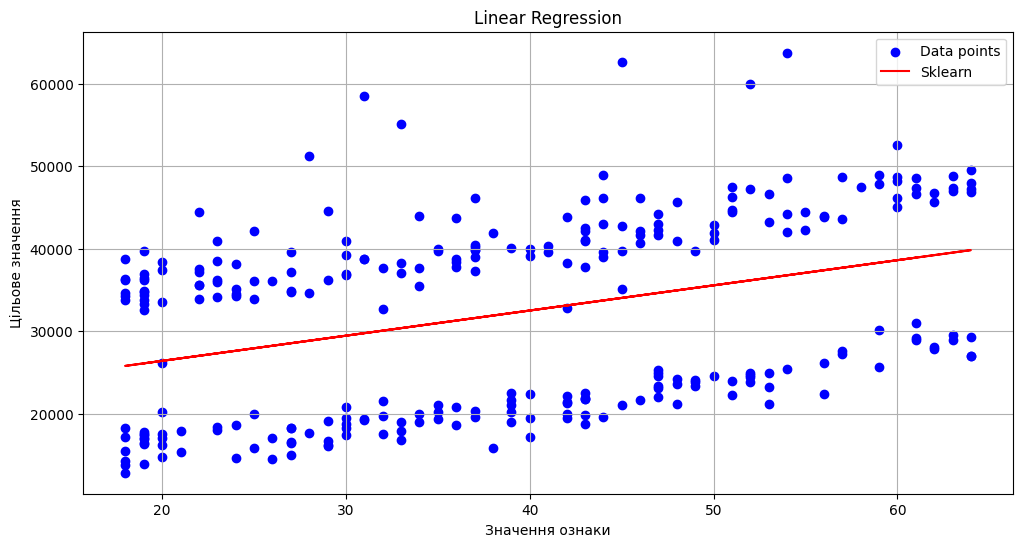

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, smoker_predictions, color='red', label='Sklearn')
plt.title('Linear Regression')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

В даному випадку модель не підходить - значення розподілені так що лінія передбачення просто розмістилась посередині.
До того ж видно що rmse дуже близько до значення дисперсії, що уже викликає сумніви.
Мені здається що потрібна або зовсім інша модель або додавати ще фічі які будуть пояснювати таку різницю таргета і будувати окремі регресійні моделі